In [1]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime
from time import time
# import dill
import pickle
import glob
import importlib
import numpy as np
import scipy as sp
import scipy.misc
import pandas as pd
import re
import itertools
from scanf import scanf
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm, PowerNorm, Normalize
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate, optimize, sparse
from scipy.interpolate import interp1d, interp2d
from IPython.display import display, HTML, Math
from scipy import interpolate
from tqdm.notebook import tqdm as tqdm_notebook

# from act_act_src import baseClass
from act_src import particleClass
from act_src import interactionClass
from act_src import problemClass
from act_src import relationClass
from act_codeStore.support_class import *
from act_codeStore import support_fun
from act_codeStore import support_fun_calculate as spc

PWD = os.getcwd()
np.set_printoptions(linewidth=110, precision=5)

params = {'animation.html': 'html5',
          'font.family':    'sans-serif',
          'font.size':      15, }
preamble = r' '
preamble = preamble + '\\usepackage{bm} '
preamble = preamble + '\\usepackage{amsmath} '
preamble = preamble + '\\usepackage{amssymb} '
preamble = preamble + '\\usepackage{mathrsfs} '
preamble = preamble + '\\DeclareMathOperator{\\Tr}{Tr} '
params['text.latex.preamble'] = preamble
params['text.usetex'] = True
plt.rcParams.update(params)

In [2]:
calculate_fun_dict = {
    'do_FiniteDipole2D':       spc.do_FiniteDipole2D,
    'do_LimFiniteDipole2D':    spc.do_LimFiniteDipole2D,
    'do_behaviorParticle2D':   spc.do_behaviorParticle2D,
    'do_actLimFiniteDipole2D': spc.do_actLimFiniteDipole2D,
}
prbHandle_dict = {
    'do_FiniteDipole2D':       problemClass.finiteDipole2DProblem,
    'do_LimFiniteDipole2D':    problemClass.limFiniteDipole2DProblem,
    'do_behaviorParticle2D':   problemClass.behavior2DProblem,
    'do_actLimFiniteDipole2D': problemClass.actLimFiniteDipole2DProblem,
}
rltHandle_dict = {
    'do_FiniteDipole2D':       relationClass.finiteRelation2D,
    'do_LimFiniteDipole2D':    relationClass.limFiniteRelation2D,
    'do_behaviorParticle2D':   relationClass.VoronoiBaseRelation2D,
    'do_actLimFiniteDipole2D': relationClass.VoronoiBaseRelation2D,
}
ptcHandle_dict = {
    'do_FiniteDipole2D':       particleClass.finiteDipole2D,
    'do_LimFiniteDipole2D':    particleClass.limFiniteDipole2D,
    'do_behaviorParticle2D':   particleClass.particle2D,
    'do_actLimFiniteDipole2D': particleClass.limFiniteDipole2D,
}

## Daniel S Calovi et al 2014 New J. Phys. 16 015026

  0%|          | 0/100 [00:00<?, ?it/s]

<AxesSubplot:>

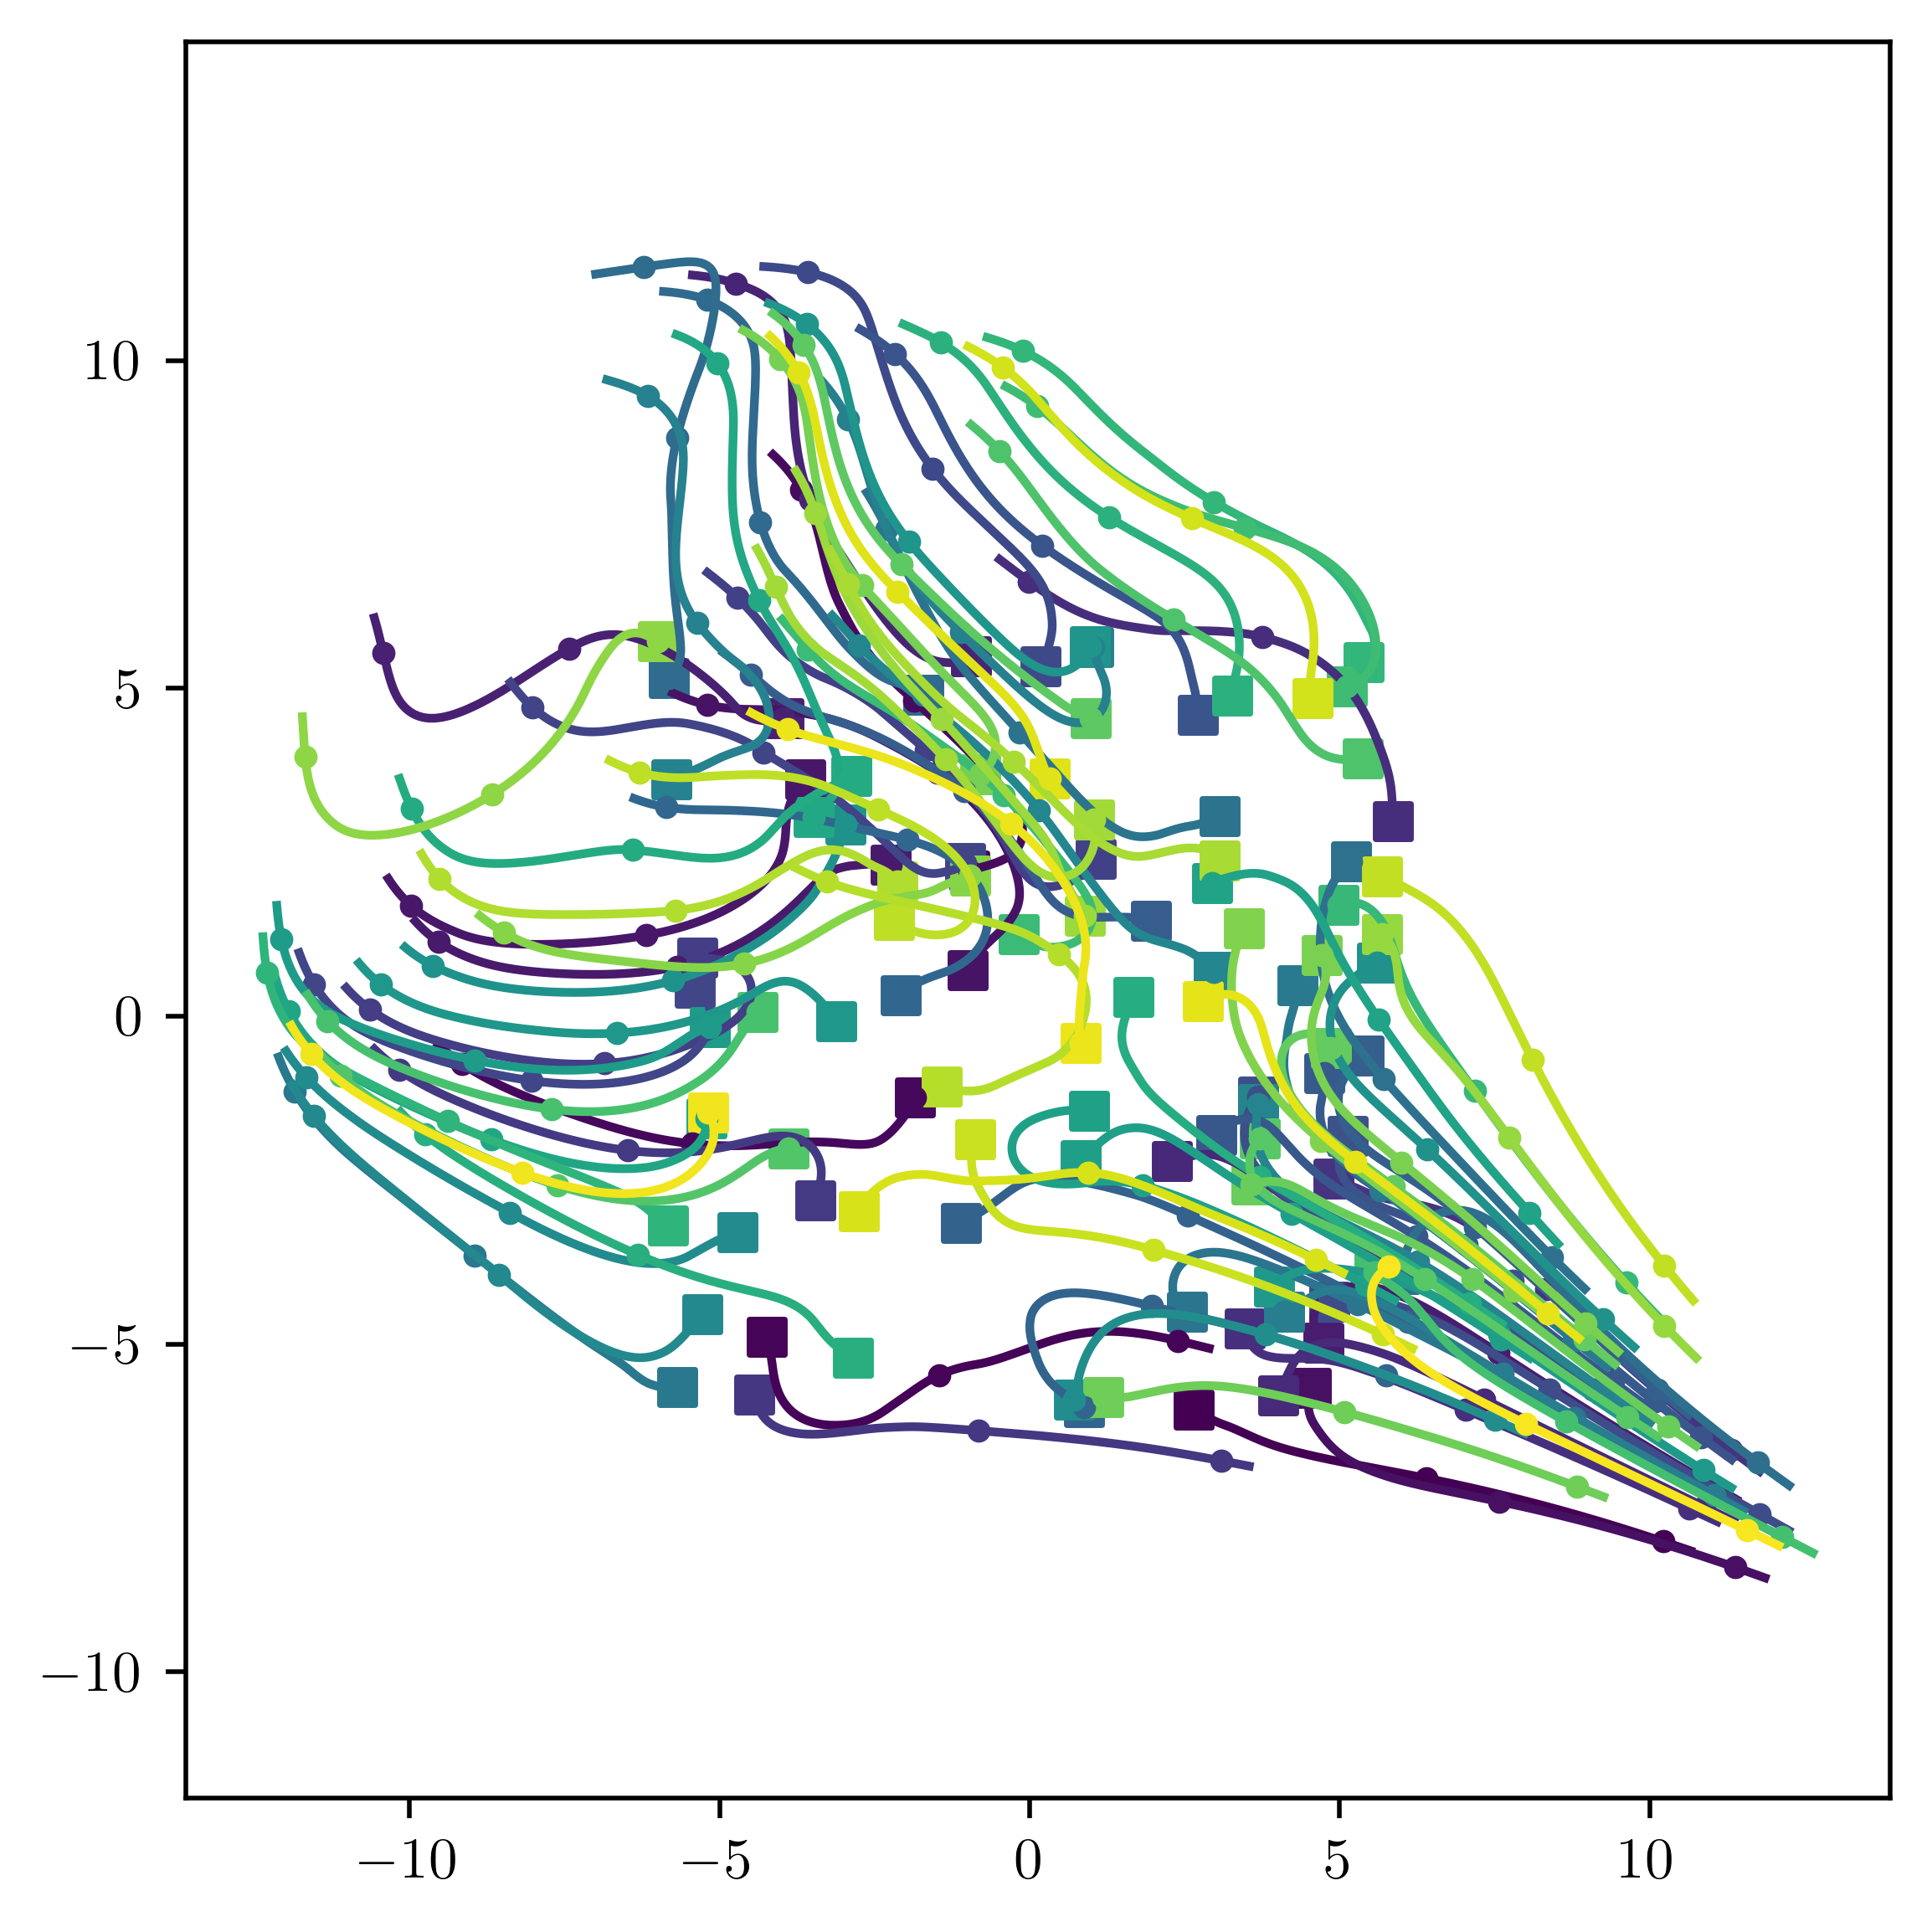

In [4]:
def ini_particle(name='ptc2D'):
    tptc = particleClass.particle2D(name=name)
    tptc.u = u
    prb1.add_obj(tptc)
    return tptc

update_fun, update_order, eval_dt = '1fe', (0, 0), 0.01
nptc, max_t, calculate_fun = 100, 10, 'do_behaviorParticle2D'

problem_kwargs = {
    'ini_t':           np.float64(0),
    'max_t':           eval_dt * 1e3,
    'update_fun':      '1fe',
    'update_order':    (0, 0),
    'eval_dt':         eval_dt,
    'calculate_fun':   calculate_fun_dict[calculate_fun],
    'prbHandle':       prbHandle_dict[calculate_fun],
    'rltHandle':       rltHandle_dict[calculate_fun],
    'ptcHandle':       ptcHandle_dict[calculate_fun],
    'fileHandle':      'activeParticle2D',
    'save_every':      np.int64(1),
    'nptc':            np.int64(nptc),
    'overlap_epsilon': np.float64(0.01),
    'un':              np.float64(0.02) / 0.024, # \xi=0.024 characteristic persistence length, see Calovi2014
    'ln':              np.float64(-1),
    'Xlim':            np.float64(6),
    'attract':         np.float64(0.41),
    'align':           np.float64(2.7),
    'seed':            1,
    'tqdm_fun':        tqdm_notebook,
}
    
doPrb1 = problem_kwargs['calculate_fun'](**problem_kwargs)
prb1 = doPrb1.do_calculate(ini_t=problem_kwargs['ini_t'], max_t=max_t, eval_dt=eval_dt, )

################################################################################3

# %matplotlib notebook
%matplotlib inline

figsize=np.array((9, 9))*0.5
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
nmarker = 0.1

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
cmap = plt.get_cmap('viridis')
for obji in prb1.obj_list:
    color = cmap(obji.index / prb1.n_obj)
    tidx = prb1.t_hist >= plt_tmin
    X_hist = obji.X_hist[tidx]
    axi.scatter(X_hist[0, 0], X_hist[0, 1], color=color, marker='s')
    axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
support_fun.set_axes_equal(axi)


<AxesSubplot:>

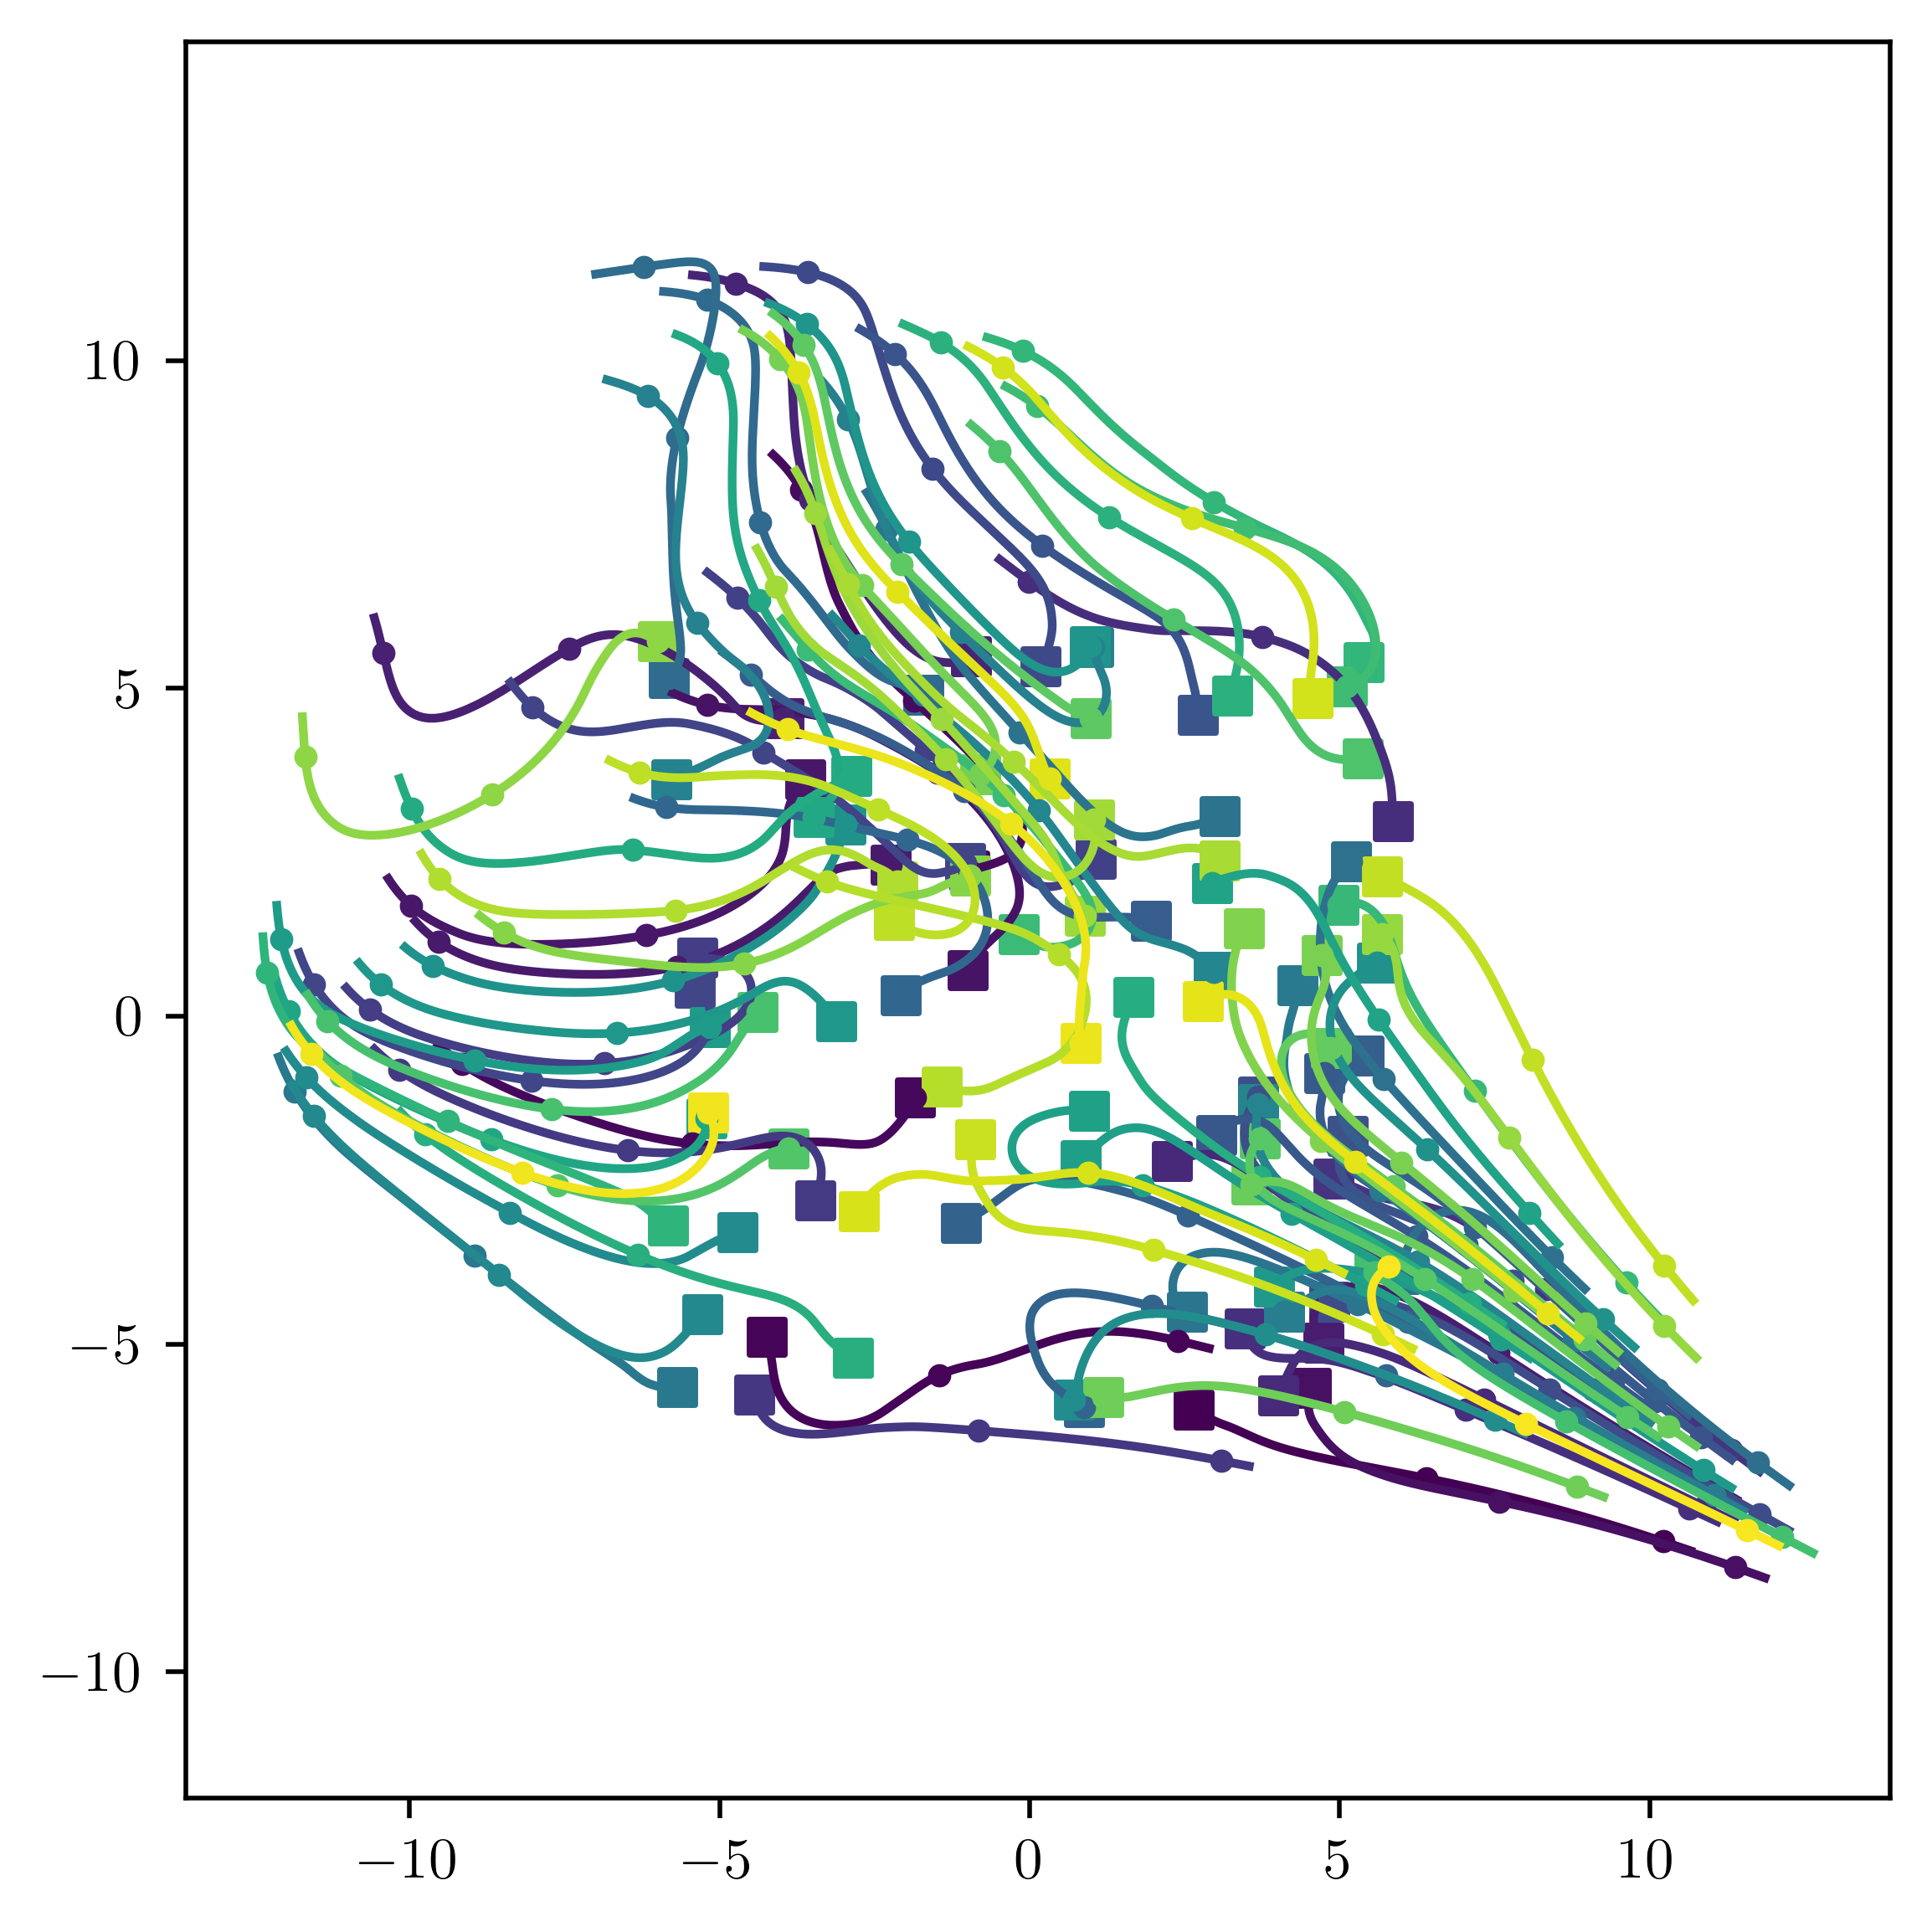

In [28]:

# %matplotlib notebook
%matplotlib inline

figsize=np.array((9, 9))*0.5
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
plt_tmin = -1
nmarker = 0.1

fig, axi = plt.subplots(1, 1, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
cmap = plt.get_cmap('viridis')
for obji in prb1.obj_list:
    color = cmap(obji.index / prb1.n_obj)
    tidx = prb1.t_hist >= plt_tmin
    X_hist = obji.X_hist[tidx]
    axi.scatter(X_hist[0, 0], X_hist[0, 1], color=color, marker='s')
    axi.plot(X_hist[:, 0], X_hist[:, 1], '.-', color=color, markevery=nmarker)
support_fun.set_axes_equal(axi)


In [19]:
prb1.polar, prb1.milling_Daniel2014

(0.12886583260368187, 0.003469117059616389)

In [16]:
obji.X_hist

array([[ 0.85072, -4.46726],
       [ 0.85072, -4.46726],
       [ 0.85072, -4.46726],
       [ 0.85072, -4.46726],
       [ 0.85072, -4.46726],
       [ 0.85072, -4.46726],
       [ 0.85072, -4.46726],
       [ 0.85072, -4.46726],
       [ 0.85072, -4.46726],
       [ 0.85072, -4.46726],
       [ 0.85072, -4.46726]])